# Fruit and Vegetable Prices


## Data set selection

> In this section, you will need to provide the following information about the selected data set:

### Source (with link) 
The dataset comes from the USDA Economic Research Service – Fruit and Vegetable Prices Database.  
Link: https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/

---

### Fields

- **`Fruit`** – Name of the fruit  
- **`Form`** – The form in which the fruit is sold (Fresh, Canned, Juice, Frozen, etc.)  
- **`RetailPrice`** – Price per unit as sold (e.g., per pound, per pint)  
- **`RetailPriceUnit`** – Unit of pricing  
- **`Yield`** – Edible yield percentage after removing waste (peel, core, etc.)  
- **`CupEquivalentSize`** – How much product is needed to make 1 edible cup  
- **`CupEquivalentUnit`** – Unit used for the cup conversion  
- **`CupEquivalentPrice`** – Cost to obtain one edible cup of the fruit  

---

### License
Creative Commons CCZero  
Link: http://www.opendefinition.org/licenses/cc-zero

### Data set selection rationale

I selected this dataset because this dataset could provide real-world economic and nutrition data that are useful for health insights. It includes multiple variables that I can use for statistical analysis. The dataset is clean overall, I didn't have to preprocess it. By analyzing this dataset, I might be able to create analysis related to fruit affordability, and which fruits bring most value based on its price and yield.

### Questions to be answered

> Using statistical analysis and visualization, what questions would you like to be able answer about this dataset.
> This could include questions such as:
 - What is the price distribution of different fruits?  
 We can compare how fruit prices varies in cost  
 - What is the average retail price for different fresh fruits?  
 We can compare how fresh fruit prices vary in cost
 - How does the form of the fruit affect the retail price?  
 This helps determine whether processing tends to make specific fruit more or less expensive
 - What is the relationship between retail price and cup equivalent price?  
 This helps understand how much edible fruit consumers actually get for the price they pay
 - How does yield impact the cost of edible fruit?
 This may answer if a fruit with low yield may be cheap per pound but be more expensive per serving
 - What are top 5 affordable fruits based on cup equivalent price?  
 This helps identify the most 5 affordable fruits. With the data collected, this would answer what fruits are the best for budget planning  
 - What is the distribution of fruit forms?
 This would answer which type of fruit products dominate the dataset. For stakeholders, it would help them understand what products consumers have access to.

### Visualization ideas

> Provide a few examples of what you plan to visualize to answer the questions you posed in the previous section. In this project, you will be producing 6-8 visualizations. You will also be producing an interactive chart using Plotly.
1. Histogram and box plot for the distribution of fruit prices. This would show how fruits generally vary across the dataset.
1. Interactive bar chart using Plotly for the average retail prices. This would show how fresh fruit prices vary across the dataset. By using Plotly, it would handle multiple labels of fruits on interacting with chart.  
2. Grouped bar chart for retail price vs form. This would show whether fresh or frozen tend to be cheaper or more expensive.  
3. Scatter plot for retail price vs cup equivalent price. This would help identify correlation between retail price and cup equivalent price so that stakeholders can what fruits bring the good value. I would use plotly for this chart because that way, it allows to label which help stakeholders see exact price values, make correlation patterns clearer.  
4. Interative scatter plot for the impact of yield on cup equivalent price. This would show how edible yield affects how much the consumers pay. Low-yield fruit may seem cheap per pound but expensive per cup.  
5. Bar chart for top 5 most affordable fruits. This would help identify the cheapest fruit based on cup equivalent price. This would be used for budget planning.  
6. Pie chart for distribution of fruit forms. This would help understand which types of fruit products dominate the dataset.



## Setup and Import Libraries

In [127]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  import plotly.express as px
  import plotly.graph_objects as go
  PLOTLY_AVAILABLE = True
except ImportError:
  PLOTLY_AVAILABLE = False
  print("Note: Plotly not available. Interactive visualizations will be skipped.")

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## Visualization Style Setup

In [128]:
# =============================================================================
# VISUALIZATION STYLE SETUP
# =============================================================================
# Inspired from Professor Gilany's Visualization Style Setup
# Setting up consistent styling for all our charts
# Set default matplotlib parameters
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'normal',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'patch.linewidth': 0.5,
    'patch.edgecolor': 'white',
    'grid.linewidth': 0.8,
    'grid.alpha': 0.3
})
# Set the overall style
sns.set_style('whitegrid', {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.edgecolor': '.2',
    'axes.linewidth': 1.2
})
sns.set_context('notebook', font_scale=1.1)

# Define a clean, modern color palette
sns.set_palette("pastel")

print("✅ Theme successfully loaded! All visualizations will use consistent styling.")

✅ Theme successfully loaded! All visualizations will use consistent styling.


## 📊 Loading the Data
Load the fruit and vegetable prices dataset

In [129]:
from pathlib import Path
import pandas as pd


def load_csv(path: Path) -> pd.DataFrame:
  try:
    df = pd.read_csv(path)
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path.name}. check data/ folder and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path.name}. check delimiter or bad rows.") from e
  else:
    return df


# Load the fruit and vegetables dataset
path = 'data/Fruit-Prices-2022.csv'
df = load_csv(path)

# Display basic information about the dataset
print('Dataset Shape:', df.shape)
display(df.head())

Dataset Shape: (62, 8)


,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145


### Creating new column
I decide to create `CoreFruit` column that shows the core fruit of each record in `Fruit` column 

In [130]:
# Create Core Fruit column
df['CoreFruit'] = df['Fruit'].str.split(',').str[0].str.strip()
display(df.head())

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,CoreFruit
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996,Apples
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323,Apples
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349,Apples
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043,Apples
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145,Apricots


## 📊 Visualization Idea 1: Distribution of Fruit Retail Price
The `RetailPrice` is a key variable because it shows the cost of different kinds of fruits even their forms. It helps contribute to visualize the `RetailPrice` distribution which is curicial insight for market analysis. By illustrating the distribution, we will know how the `RetailPrice` are spread out and even recognize the outlier, and the price consistency.

Let's first get a summary of the statistics and retrieve necessary value for visualization

In [131]:
# Retrieve retail price
retail_price = df['RetailPrice']

# Get the statistical summary
stats_summary = retail_price.describe()

# Compute statistics and convert to dictionary
stats = {
    'Mean': stats_summary['mean'],
    'Min': stats_summary['min'],
    'Q1 (25th percentile)': stats_summary["25%"],
    'Median (50th percentile)': stats_summary["50%"],
    'Q3 (75th percentile)': stats_summary["75%"],
    'Max': stats_summary['max']
}

# Tidy table
stats_df = stats_summary.to_frame().T
stats_df.columns = ['Count', 'Mean', 'Std', 'Min',
                    'Q1 25%', 'Median 50%', 'Q3 75%', 'Max']
tidy_table = stats_df.style.format('{:.2f}')
display(tidy_table)

,Count,Mean,Std,Min,Q1 25%,Median 50%,Q3 75%,Max
RetailPrice,62.00,2.99,2.27,0.38,1.36,2.16,4.12,10.30


### 📊 Fruit Price Dataset Summary
From the table summary, we can see:
- **Count:** 62 fruits  
- **Mean (Average):** ~2.99  
- **Standard Deviation (Std):** Measure of how spread out the prices are  
- **Minimum Price:** 0.38  
- **Maximum Price:** 10.30  
- **Q1 (25% = 1.36):** One-quarter of fruits cost less than $1.36.  
- **Median (50% = 2.16):** Half of the fruits are priced below $2.16, and half above.  
- **Q3 (75% = 4.12):** Three-quarters of fruits are priced below $4.12, with the remaining quarter being more expensive.  



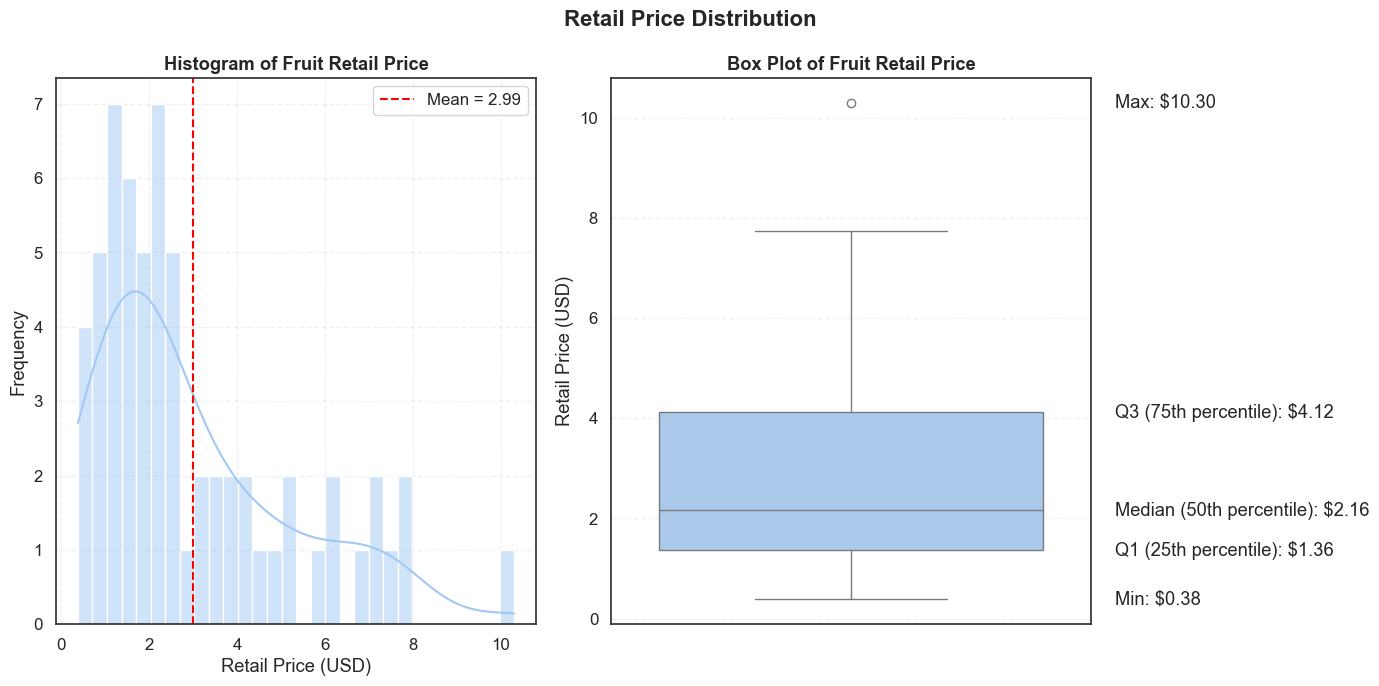

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Left panel: distribution
sns.histplot(data=df, x='RetailPrice', bins=30, kde=True,
             ax=axes[0])
axes[0].axvline(stats['Mean'], color='red', linestyle='--',
                label=f'Mean = {stats['Mean']:.2f}')
axes[0].set_xlabel('Retail Price (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Fruit Retail Price')
axes[0].legend()

# Right panel: box plot
sns.boxplot(y=df['RetailPrice'], ax=axes[1])
axes[1].set_ylabel('Retail Price (USD)')
axes[1].set_title('Box Plot of Fruit Retail Price')

# Label value for box plot
label_order = ['Min', 'Q1 (25th percentile)',
               'Median (50th percentile)', 'Q3 (75th percentile)', 'Max']
for label, val in stats.items():
  if label in label_order:
    axes[1].text(
        0.55,
        val,
        f'{label}: ${val:.2f}',
        va='center', ha='left',
    )

fig.suptitle('Retail Price Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

### 🔍 Insights

With two visualizations, they indicates that most products are cheap and clustered at the low price. There are a few expensive products, with the distributon extends toward higher price, which is confirmed by the mean is significantly greater than the median due to the extreme high outliers.

## 📊 Visualization Idea 2: Average Retail Price of Fresh Fruits
The previous visualization allowed us to see the overall retail price distribution among all product forms. To see each distinct fresh fruit's price, we will use an interactive bar chart with Plotly. This chart will show the average retail price for each specific fresh fruit and clearly display their names, that way we can easily compare individual fresh fruit cost.  

At first, we need to retrieve retail price for fresh fruits

In [ ]:
# Retrieve retail price for fresh fruits
fresh_retail_price = df.loc[df['Form'] ==
                            'Fresh', ['Fruit', 'Form', 'RetailPrice', 'RetailPriceUnit']]

display(fresh_retail_price)

,Fruit,Form,RetailPrice,RetailPriceUnit
0,Apples,Fresh,1.8541,per pound
4,Apricots,Fresh,3.6162,per pound
8,Bananas,Fresh,0.5971,per pound
10,Blackberries,Fresh,6.7483,per pound
12,Blueberries,Fresh,4.1575,per pound
14,Cantaloupe,Fresh,0.7523,per pound
15,Cherries,Fresh,4.6632,per pound
17,Clementines,Fresh,1.5811,per pound
23,Grapefruit,Fresh,1.4444,per pound
25,Grapes,Fresh,2.0363,per pound


Now, our data is ready for visualization.

In [141]:
# Plotly for bar chart
fig = px.histogram(
    fresh_retail_price, x='Fruit', y='RetailPrice',
    histfunc='avg',
    title='Interactive Bar Chart: Average Retail Price of Different Fruits Forms',
    labels={'RetailPrice': 'Retail Price'},
)
fig.show()

This visualization clearly reveals the price hierarchy within the fresh fruit category. The five most expensive fresh fruits are: **raspberries, blackberries, cherries, blueberries, and apricots**. Conversely, the five least expensive fresh fruits are: **watermelon, bananas, pineapple, cantaloupe, and honeydew**. This Plotly visualization is utilized because its interactive feature allows us to hover over individual bars to view the precise average price, which static chart can not offer.

# 📊 Visualization Idea 2: Retail Price of Different Forms of Fruits (Blackberries, Blueberries, Cranberries, Strawberries)


In [ ]:
# Filter specific fruits from dataset
filter_mask = (df['CoreFruit'].str.contains('Blackberries', case=False)
               | df['CoreFruit'].str.contains('Blueberries', case=False)
               | df['CoreFruit'].str.contains('Raspberries', case=False)
               | df['CoreFruit'].str.contains('Strawberries', case=False))
selected_fruits_df = df[filter_mask]

# Pivot so each fruit x form shows its retail price
price_table = selected_fruits_df.pivot_table(
    index='CoreFruit',
    columns='Form',
    values='RetailPrice',
    aggfunc='mean'
)
x = np.arange(len(price_table.index))
bar_width = 0.13

fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Retail Price of Different Forms of Fruits', fontweight='bold')

cmap = plt.get_cmap('Spectral', len(price_table.columns))
for i, form in enumerate(price_table.columns):
  ax.bar(x+bar_width*i, price_table[form],
         width=bar_width, color=cmap(i), label=form)

ax.set_xticks(x + bar_width * (len(price_table.columns) - 1) / 2)
ax.set_xticklabels(price_table.index)

ax.set_ylabel("Retail Price")
ax.legend(title="Form")
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 📊 Visualization Idea 3: Retail Price vs Cup Equivalent Price


In [ ]:
retail_price = df['RetailPrice']
cup_price = df['CupEquivalentPrice']
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df, x=retail_price, y=cup_price, ax=ax, scatter_kws={
            'alpha': 0.4, 's': 30}, line_kws={'color': 'red', 'linewidth': '2'})

In [ ]:
retail_price = df['RetailPrice']
cup_price = df['CupEquivalentPrice']
fig = px.scatter(df, x=retail_price, y=cup_price,
                 hover_data=['Fruit', 'Form',
                             'RetailPrice', 'CupEquivalentPrice', ''],
                 labels={'RetailPrice': 'Retail Price',
                         'CupEquivalentPrice': 'Cup Equivalent Price'},
                 title='Interactive Scatter Plot: Retail Price vs Cup Equivalent Price')
fig.update_layout(width=900, height=600)
fig.show()

## 📊 Visualization Idea 4: Yield vs Cup Equivalent Price 

In [ ]:
fruit_yield = df['Yield']
cup_price = df['CupEquivalentPrice']
fig = px.scatter(df, x=fruit_yield, y=cup_price,
                 hover_data=['Fruit', 'Form',
                             'Yield', 'CupEquivalentPrice'],
                 labels={'CupEquivalentPrice': 'Cup Equivalent Price'},
                 title='Interactive Scatter Plot: Yield vs Cup Equivalent Price')
fig.update_layout(width=900, height=600)
fig.show()

## 📊 Visualization Idea 5: Top 5 Most Affordable Fruits


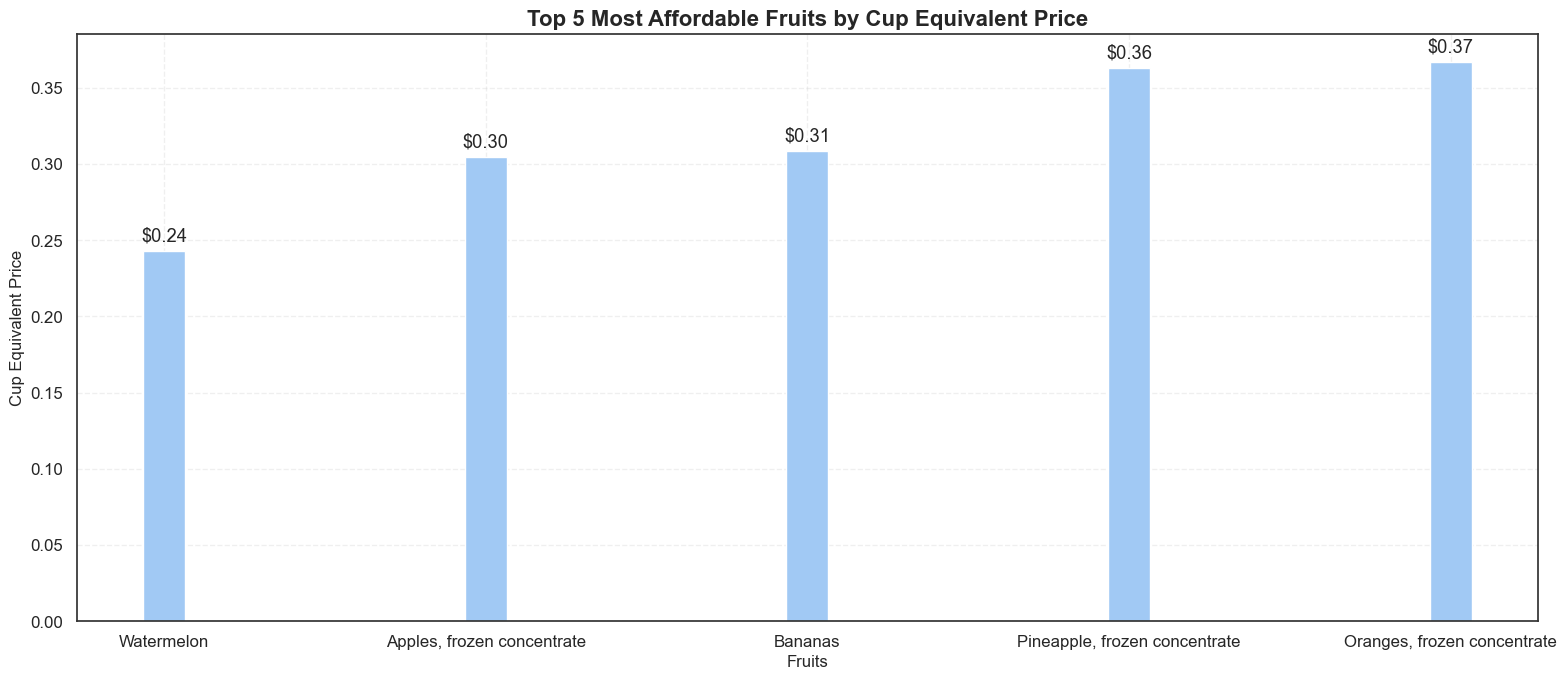

In [138]:
data5 = df[['Fruit', 'CupEquivalentPrice']].sort_values('CupEquivalentPrice')
top5 = data5[:5]
x = np.arange(len(top5.index))

fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(x=top5['Fruit'], width=0.13, height=top5['CupEquivalentPrice'])
ax.set_title(
    'Top 5 Most Affordable Fruits by Cup Equivalent Price', fontsize=16, fontweight='bold')
ax.set_xlabel('Fruits', fontsize=12)
ax.set_ylabel('Cup Equivalent Price', fontsize=12)

for i, price in enumerate(top5['CupEquivalentPrice']):
  ax.text(i, price +
          0.01, f'${price:.2f}', va='center', ha='center')

plt.tight_layout()
plt.show()

## 📊 Visualization Idea 6: Distribution of Fruit Forms


In [ ]:
form_count = df['Form'].value_counts()
form_order = df['Form'].unique().tolist()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(form_count, labels=form_order, autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white',
                   'linewidth': 1.5})
ax.set_title('Distribution of Fruit Forms', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## References